# Fama-French 1993 paper

Fama and French published a paper in 1993 challenging the idea that the market beta is the only factor explaining stock returns as it had previously been established and accepted by the investment community.

In [1]:
# Libraries utilized

import pandas as pd
# Tell the application to show the plots within this webpage
%matplotlib inline
import statsmodels.formula.api as sm
#from pandas.stats.api import ols
import scipy.stats as stats
import matplotlib.pylab as plt
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import matplotlib.style as style

In [2]:
# Loading data from the paper
style.use("fivethirtyeight")
Return = pd.Series([1.64, 1.16,1.29,1.24,1.25,1.29,1.17,1.07,1.10,0.95,0.88,0.9])
Beta = pd.Series([1.44,1.44,1.39,1.34,1.33,1.24,1.22,1.16,1.08,1.02,0.95,0.9])
ln_ME = pd.Series([1.98,3.18,3.63,4.10,4.5,4.89,5.3,5.73,6.24,6.82,7.39,8.44])
#ln_ME it's the Size factor and stands for natural logarithm of Market Equity

size_ports = pd.DataFrame({'Return': Return,'Beta': Beta,'ln_ME':ln_ME})
size_ports.index = ('1A', '1B', '2', '3', '4','5' ,'6' ,'7' ,'8' ,'9' ,'10A' ,'10B')
#size_ports['Ratio'] = size_ports.Return/size_ports.Beta




CAPM - Capital Asset Pricing Model marks the birth of Asset Pricing Theory

$$ E(r_i) = r_F + \beta \left( E(r_M) - r_F \right) $$

Attributed to Sharpe(1964), Lintner(1965) and Black(1972) (aka SLB)

By 1980 the consensus was that:
- It's an elegant and intuitive 1-factor model that builds on Markowitz modern portfolio theory
- Beta is related to average returns of stocks
- The relationship (between beta and asset returns) is close to linear as predicted by CAPM
- Some imperfections are noticed regarding slope and intercept

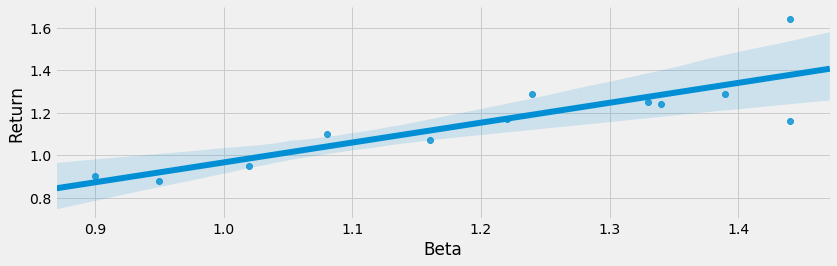

In [3]:
# Plot of the relationship between Beta and Returns in the paper's study
sns.pairplot(size_ports, x_vars= 'Beta', y_vars =['Return'], height=4, aspect=3, kind='reg')

It implies that the expected (i.e. average) return of a stock depends on two variables:

$$ r_F \space\space\space and \space\space\space E(r_M) $$

Where $r_F$ is the risk-free rate and it's considered a given constant

And $E(r_M)$ is the return of the whole Market 

Particularly, $E(r_M)$ is the ONLY source of risk in this model

We can estimate this $\beta$ through:

- Time series regression for each stock and that's why it's frequently also called "historical beta"

In [4]:
# Now, let's run some regression with the data provided in the paper
result = sm.ols(formula="Return ~ Beta", data=size_ports).fit()
result2 = sm.ols(formula="Return ~ ln_ME", data=size_ports).fit()
result3 = sm.ols(formula="Return ~ Beta + ln_ME", data=size_ports).fit()

print (result.summary())
print 
print(result2.summary())
print 
print(result3.summary())

#size_ports['Reg_Line_Beta'] = size_ports.Beta * result.params.Beta + result.params.Intercept
#size_ports['Reg_Line_Size'] = size_ports.ln_ME * result2.params.ln_ME + result.params.Intercept




                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     24.47
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           0.000581
Time:                        00:17:59   Log-Likelihood:                 9.7041
No. Observations:                  12   AIC:                            -15.41
Df Residuals:                      10   BIC:                            -14.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0303      0.231      0.131      0.8

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     437.6
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           1.38e-09
Time:                        00:28:16   Log-Likelihood:                 15.040
No. Observations:                  12   AIC:                            -26.08
Df Residuals:                      10   BIC:                            -25.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4000      0.023     59.654      0.0

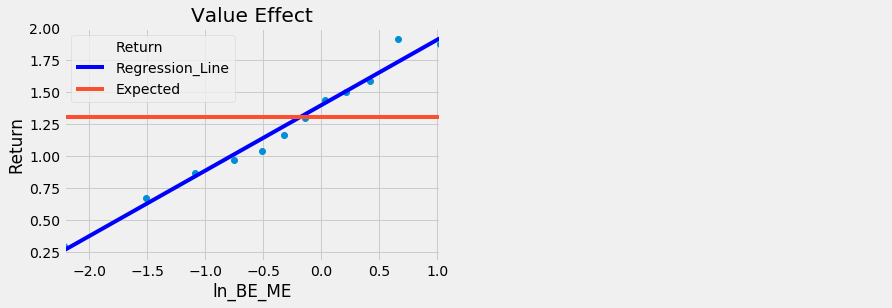

In [5]:
# Adding Value factor (ln_BE_ME stands for natural logarithm of Book Equity to Market Equity)

Return = pd.Series([.3, .67,.87,.97,1.04,1.17,1.3,1.44,1.5,1.59,1.92,1.88])
Beta = pd.Series([1.36,1.34,1.32,1.3,1.28,1.27,1.27,1.27,1.27,1.29,1.33,1.35])
ln_ME = pd.Series([4.53,4.67,4.69,4.56,4.47,4.38,4.23,4.06,3.85,3.51,3.06,2.65])
ln_BE_ME = pd.Series([-2.22,-1.51,-1.09,-.75,-.51,-.32,-.14,.03,.21,.42,.66,1.02])

size_ports = pd.DataFrame({'Return': Return,'Beta': Beta,'ln_ME':ln_ME,'ln_BE_ME':ln_BE_ME})
size_ports.index = ['1A', '1B', '2', '3', '4','5' ,'6' ,'7' ,'8' ,'9' ,'10A' ,'10B']

#print (size_ports)


result = sm.ols(formula="Return ~ ln_BE_ME", data=size_ports).fit()
size_ports['Regression_Line'] = size_ports.ln_BE_ME * result.params.ln_BE_ME + result.params.Intercept
size_ports['Expected'] = [size_ports.Beta.mean()]*len(size_ports)
print (result.summary())

fig, ax = plt.subplots()
size_ports.plot(y='Return',x='ln_BE_ME',ax=ax,style='o') # 
size_ports.plot(y='Regression_Line',x='ln_BE_ME',ax=ax,color='blue')
size_ports.plot(y='Expected',x='ln_BE_ME',ax=ax,grid=True)
ax.set_title('Value Effect')
ax.set_ylabel('Return')

for label,x,y in zip(size_ports.index,size_ports.ln_ME,size_ports.Return):
    plt.annotate(label,xy=(x,y),xytext=(20,-20),textcoords='offset points', ha='right', va='top')



t-stats of factors when regressed alone to returns:
Beta : -0.832
Size : -5.631
Value: 20.920

# Double sort portfolios

Now, we load data from another experiment in the same paper, where 100 portfolios where created by means of a double sort.

Description: Sort all stocks by size and divide in 10 portfolios, then sort each of these portfolios by beta and divide in 10 again forming 100 portfolios in total


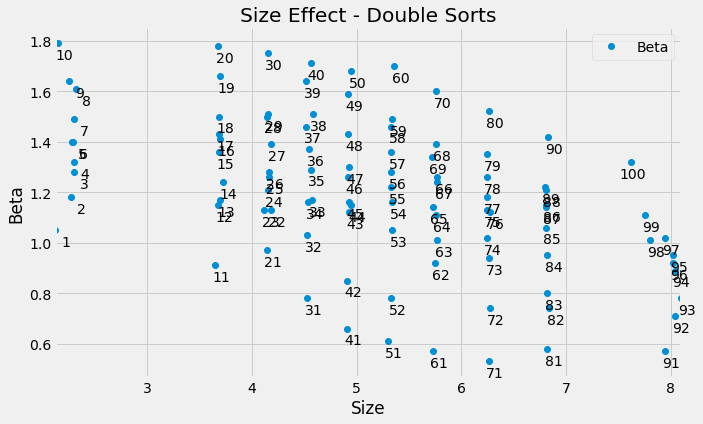

In [6]:
# Distribution of portfolios 

Sizes = pd.Series([2.12,2.27,2.3,2.3,2.28,2.29,2.3,2.32,2.25,2.15,
                   3.65,3.68,3.7,3.72,3.69,3.7,3.69,3.69,3.7,3.68,
                   4.14,4.18,4.12,4.15,4.16,4.16,4.18,4.14,4.15,4.15,
                   4.53,4.53,4.57,4.54,4.56,4.55,4.52,4.58,4.52,4.56,
                   4.91,4.91,4.93,4.95,4.93,4.92,4.93,4.92,4.92,4.95,
                   5.3,5.33,5.34,5.34,5.33,5.33,5.33,5.33,5.34,5.36,
                   5.73,5.75,5.77,5.76,5.73,5.77,5.77,5.76,5.72,5.76,
                   6.26,6.27,6.26,6.24,6.24,6.27,6.24,6.24,6.24,6.26,
                   6.82,6.84,6.82,6.82,6.81,6.81,6.81,6.81,6.8,6.83,
                   7.94,8.04,8.1,8.04,8.02,8.02,7.94,7.8,7.75,7.62])

Betas = pd.Series([1.05,1.18,1.28,1.32,1.40,1.40,1.49,1.61,1.64,1.79,
                  .91,1.15,1.17,1.24,1.36,1.41,1.43,1.5,1.66,1.78,
                  .97,1.13,1.13,1.21,1.26,1.28,1.39,1.5,1.51,1.75,
                  .78,1.03,1.17,1.16,1.29,1.37,1.46,1.51,1.64,1.71,
                  .66,.85,1.12,1.15,1.16,1.26,1.3,1.43,1.59,1.68,
                  .61,.78,1.05,1.16,1.22,1.28,1.36,1.46,1.49,1.7,
                  .57,.92,1.01,1.11,1.14,1.26,1.24,1.39,1.34,1.6,
                  .53,.74,.94,1.02,1.13,1.12,1.18,1.26,1.35,1.52,
                  .58,.74,.8,.95,1.06,1.15,1.14,1.21,1.22,1.42,
                  .57,.71,.78,.89,.95,.92,1.02,1.01,1.11,1.32])

Returns = pd.Series([1.71,1.57,1.79,1.61,1.5,1.5,1.37,1.63,1.5,1.42,
                     1.25,1.42,1.36,1.39,1.65,1.61,1.37,1.31,1.34,1.11,
                     1.12,1.31,1.17,1.7,1.29,1.1,1.31,1.36,1.26,.76,
                     1.27,1.13,1.54,1.06,1.34,1.06,1.41,1.17,1.35,.98,
                     1.34,1.42,1.39,1.48,1.42,1.18,1.13,1.27,1.18,1.08,
                     1.08,1.53,1.27,1.15,1.2,1.21,1.18,1.04,1.07,1.02,
                     .95,1.21,1.26,1.09,1.18,1.11,1.24,.62,1.32,.76,
                     1.09,1.05,1.37,1.2,1.27,.98,1.18,1.02,1.01,.94,
                     .98,.88,1.02,1.14,1.07,1.23,.94,.82,.88,.59,
                     1.01,.93,1.1,.94,.93,.89,1.03,.71,.74,.56])

ports = pd.DataFrame({'Beta': Betas,'Return': Returns,'Size': Sizes})
ports.index = range(1,101)



fig, ax = plt.subplots()
ports.plot(y='Beta',x='Size',figsize=(10,6),ax=ax,style='o') # 
ax.set_title('Size Effect - Double Sorts')
ax.set_ylabel('Beta')

for label,x,y in zip(ports.index,ports.Size,ports.Beta):
    plt.annotate(label,xy=(x,y),xytext=(15,-5),textcoords='offset points', ha='right', va='top')
    

In [7]:
# Again we run regression to individual factors to find the t-stat
result = sm.ols(formula="Return ~ Beta", data=ports).fit()
print (result.params)
print (result.summary())

result = sm.ols(formula="Return ~ Size", data=ports).fit()
print (result.params)
print (result.summary())

result = sm.ols(formula="Return ~ Beta + Size", data=ports).fit()
print (result.params)
print (result.summary())

Intercept    1.063736
Beta         0.104835
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.523
Date:                Sun, 02 Aug 2020   Prob (F-statistic):              0.220
Time:                        00:36:59   Log-Likelihood:                -2.8475
No. Observations:                 100   AIC:                             9.695
Df Residuals:                      98   BIC:                             14.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

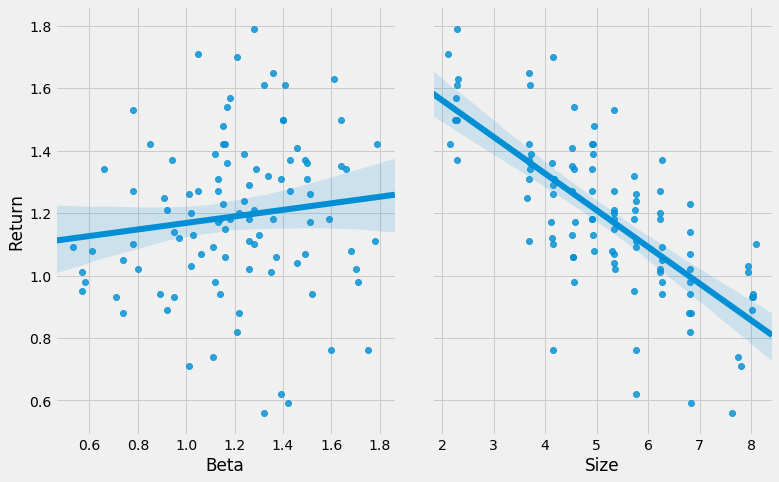

In [8]:
# Returns seem more aligned to the Size dimension and less dispersed than on Beta dimension
sns.pairplot(ports, x_vars= ['Beta', 'Size'], y_vars =['Return'], height=7, aspect=.8, kind='reg')

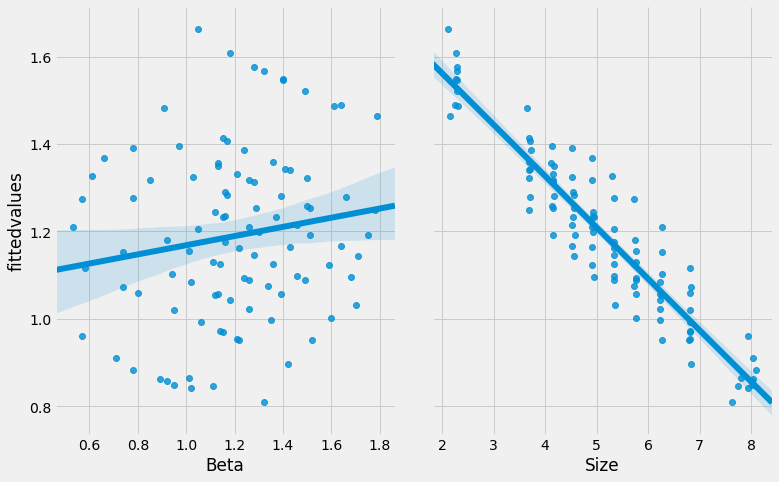

In [9]:
ports['fittedvalues'] = result.fittedvalues
sns.pairplot(ports, x_vars= ['Beta', 'Size'], y_vars =['fittedvalues'], height=7, aspect=.8, kind='reg')


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


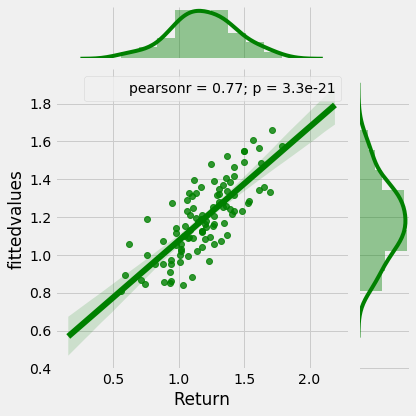

In [10]:
this_plot = sns.jointplot(data=ports, x='Return',y='fittedvalues',kind='reg',color='g')
this_plot.annotate(stats.pearsonr)

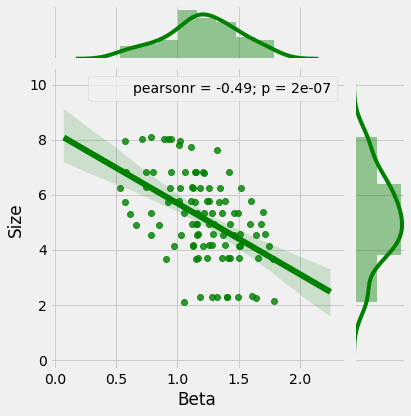

In [11]:
# Analysis of Beta and Size variables, they have a strong negative correlation (-.49)

this_plot = sns.jointplot(data=ports, x='Beta',y='Size',kind='reg',color='g')
this_plot.annotate(stats.pearsonr)


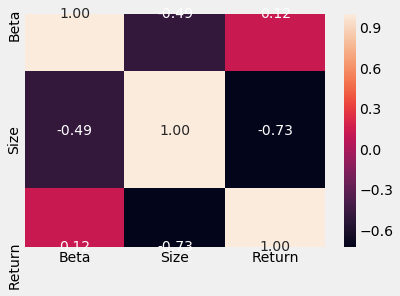

In [12]:
# Continuation of analysis  of correlation among variables ( Size has a stronger correlation with returns than Beta)
sns.heatmap(ports[['Beta','Size','Return']].corr(), annot=True, fmt='.2f')

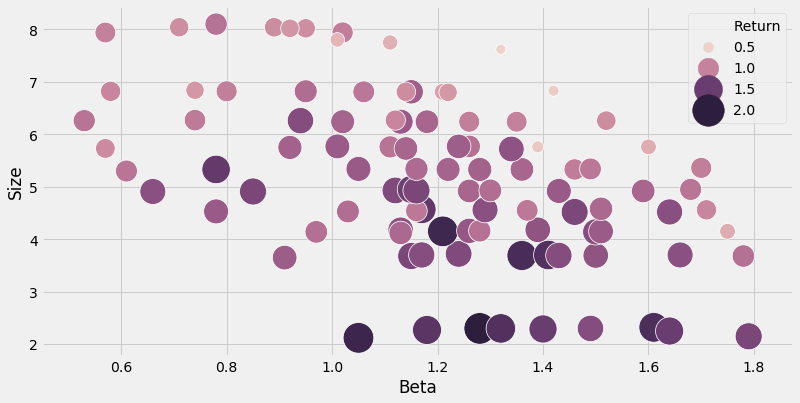

In [13]:
# View of all portfolios in the Beta vs Size coordinates, the size of the bubble indicates the size of the return
# The plot show visually that Size factor more accurately predicts size of the return than Beta
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Beta", y="Size", size="Return", sizes=(100, 1000), hue='Return', data=ports)

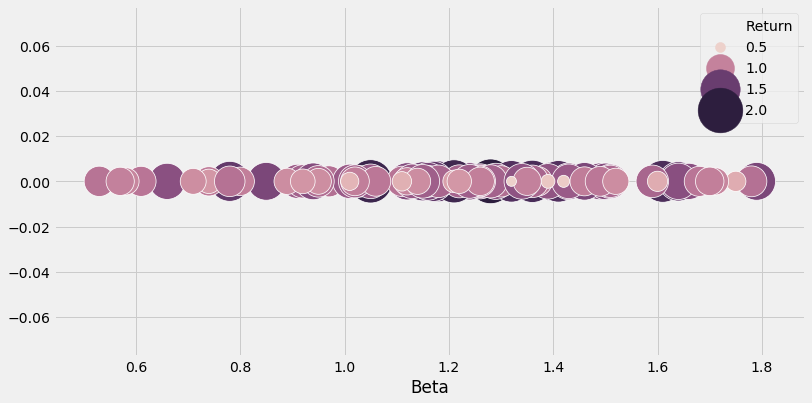

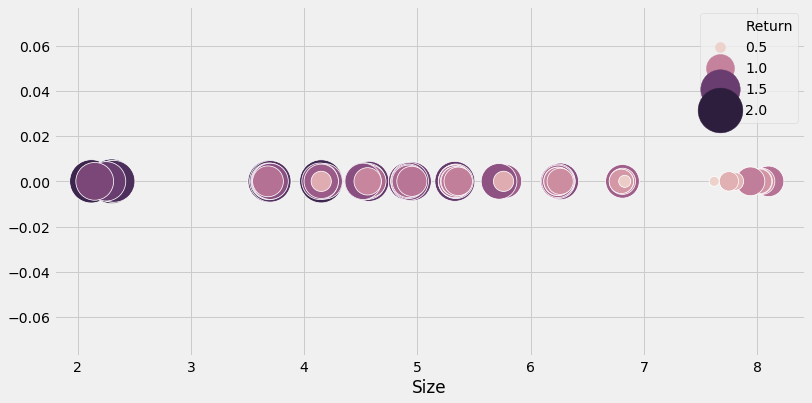

In [14]:
# When we show all 100 portfolio returns against a flat line for their beta and size
# we observe much more randomness in the beta plot and more order (dark to light) in the size one

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Beta", y=0, size="Return", sizes=(100, 2000), hue='Return', data=ports)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Size", y=0, size="Return", sizes=(100, 2000), hue='Return', data=ports)

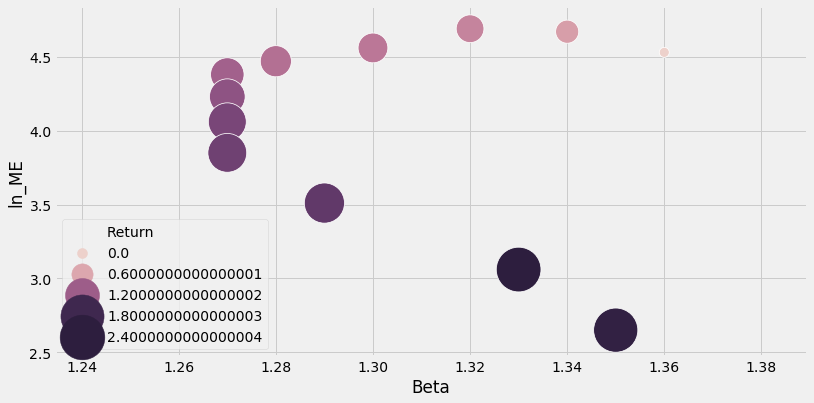

In [15]:
# View of 10 size portfolios in the Beta vs Size coordinates, the size of the bubble indicates the size of the return
# The plot show visually that Size factor more accurately predicts size of the return than Beta
# Actually Beta shows the right behavior in small Cap portfolios, while it presents the opposite behavior in large Cap portfolios

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Beta", y="ln_ME", size="Return", sizes=(100, 2000), hue='Return', data=size_ports)

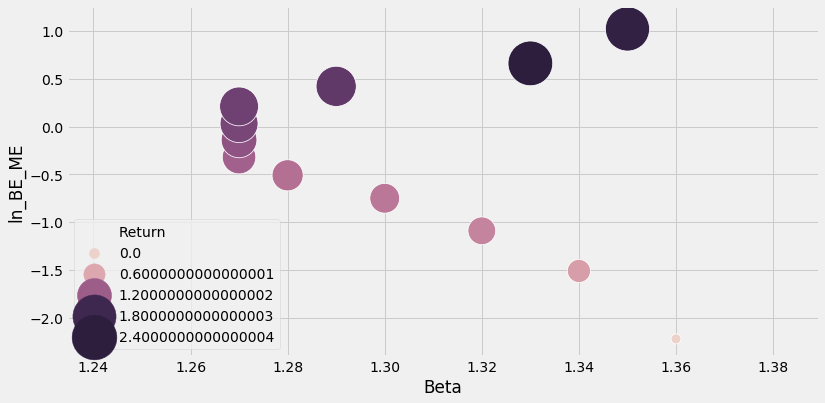

In [16]:
# View of 10 size portfolios in the Beta vs Value coordinates, the size of the bubble indicates the size of the return
# The plot show visually that Value factor more accurately predicts size of the return than Beta
# Actually Beta shows the right behavior in positive Value portfolios, while it presents the opposite behavior in
# negative Value portfolios

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Beta", y="ln_BE_ME", size="Return", sizes=(100, 2000), hue='Return', data=size_ports)

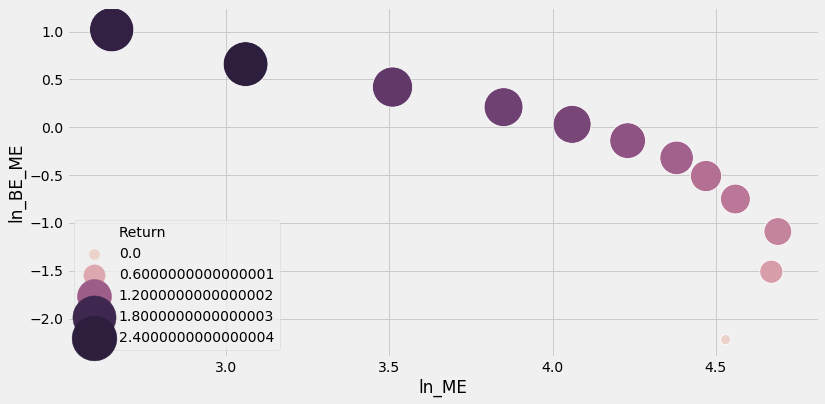

In [17]:
# View of 10 size portfolios in the Size vs. Value coordinates, the size of the bubble indicates the size of the return
# Seems like using only these two variables we have a great prediction of the returns

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="ln_ME", y="ln_BE_ME", size="Return", sizes=(100, 2000), hue='Return', data=size_ports)

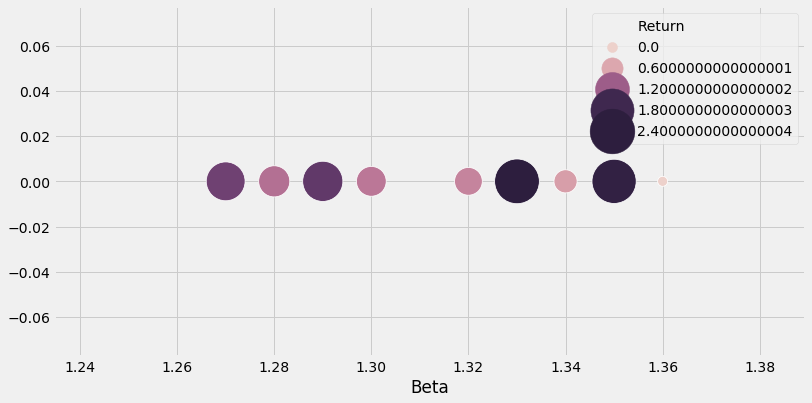

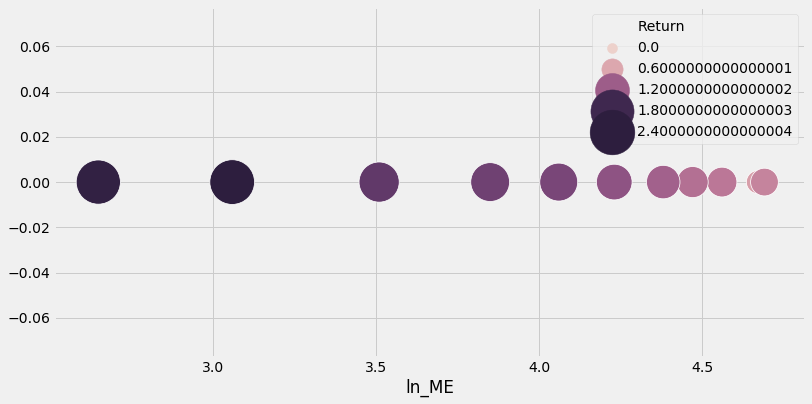

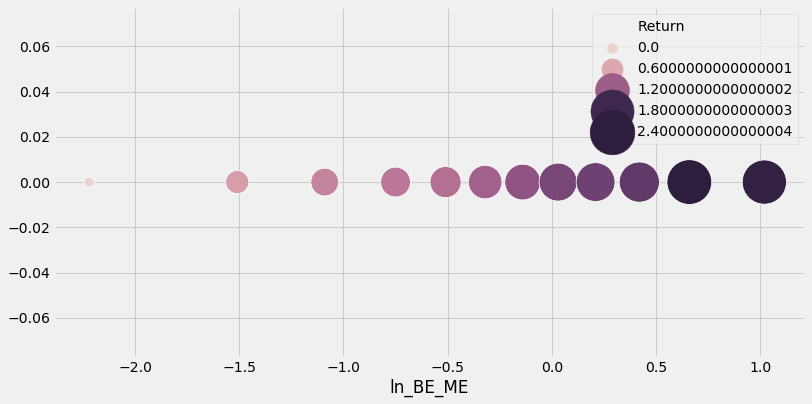

In [16]:
# When we show the 10+2 decile size portfolio returns against a flat line for their beta, size and value
# we observe much more randomness in the beta plot and more order (dark to light) in the size one
# also very clear sort (like to dark) in value dimension

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="Beta", y=0, size="Return", sizes=(100, 2000), hue='Return', data=size_ports)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="ln_ME", y=0, size="Return", sizes=(100, 2000), hue='Return', data=size_ports)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="ln_BE_ME", y=0, size="Return", sizes=(100, 2000), hue='Return', data=size_ports)